In [25]:
# 格子サイズを選択 8 or 16 or 32
lattice_size = 16

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [27]:
model = torch.load(f'data/prm_data_L{lattice_size}_FCN.pth')
model

OrderedDict([('fc1.weight',
              tensor([[ 4.1598e-03,  1.7941e-03,  7.8244e-02,  ..., -1.9916e-03,
                       -2.9449e-02, -4.8423e-02],
                      [ 1.4578e-02,  2.2793e-02,  6.5675e-02,  ..., -5.1591e-05,
                        7.0609e-02,  8.6980e-02],
                      [ 3.5486e-02, -1.5587e-02,  3.2034e-02,  ..., -3.4532e-03,
                        1.7414e-02, -8.5630e-03],
                      ...,
                      [-5.5555e-02, -1.4875e-02,  8.3306e-03,  ...,  8.4727e-02,
                        2.6057e-02, -7.2866e-02],
                      [-4.3424e-02,  4.5069e-02,  8.8789e-02,  ...,  2.9223e-02,
                       -4.0732e-02,  6.6578e-03],
                      [ 7.7090e-02, -1.1103e-02,  3.8986e-02,  ...,  5.7416e-02,
                        4.4708e-02,  3.2975e-02]])),
             ('fc2.weight',
              tensor([[ 0.0434,  0.0365, -0.0044,  ..., -0.1023,  0.0172, -0.0780],
                      [-0.1457,  0.0389, -0.

In [28]:
fc_weight = model['fc2.weight']
fc_weight

tensor([[ 0.0434,  0.0365, -0.0044,  ..., -0.1023,  0.0172, -0.0780],
        [-0.1457,  0.0389, -0.0304,  ...,  0.0752,  0.0415, -0.0980],
        [ 0.0090,  0.0451, -0.0148,  ..., -0.0771, -0.1178,  0.0228],
        ...,
        [ 0.0046, -0.0218, -0.0953,  ..., -0.0587, -0.1302, -0.1942],
        [ 0.0318, -0.0568, -0.0293,  ...,  0.0374, -0.1044, -0.0550],
        [-0.1341, -0.1475, -0.0717,  ...,  0.0661, -0.1539, -0.0659]])

In [29]:
fc_weight.size()

torch.Size([100, 80])

In [30]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [31]:
fc_weight_np_square

array([[ 0.04337448, -0.14570057,  0.00903475, ...,  0.00462778,
         0.03178466, -0.13405545],
       [ 0.03646668,  0.03894178,  0.04512433, ..., -0.02175639,
        -0.05682794, -0.14747475],
       [-0.00440731, -0.03044732, -0.01483503, ..., -0.09528979,
        -0.02932258, -0.07173422],
       ...,
       [-0.10231738,  0.07519654, -0.07707225, ..., -0.05865909,
         0.03742066,  0.06614464],
       [ 0.01719607,  0.04145025, -0.11782937, ..., -0.13015537,
        -0.10444044, -0.15390967],
       [-0.07801998, -0.09799965,  0.02277249, ..., -0.1942106 ,
        -0.05498789, -0.06589961]], dtype=float32)

In [32]:
fc_weight_np_square.shape

(80, 100)

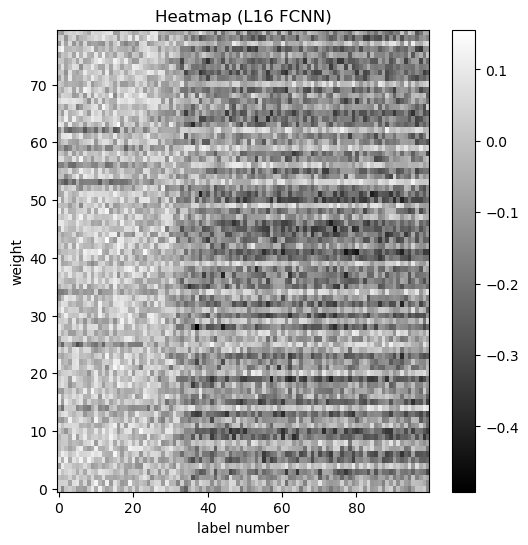

In [33]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title(f'Heatmap (L{lattice_size} FCNN)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig(f'image/L{lattice_size}_FCNN_weight.png')
plt.show()

In [34]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -0.32351613,  -0.625315  ,  -0.4010797 ,  -0.4297741 ,
        -0.63141894,  -0.2212502 ,  -1.0595565 ,  -0.23992354,
        -0.906391  ,  -0.13364476,  -0.23940182,  -0.15127671,
        -0.5612178 ,  -0.7373532 ,  -0.5792558 ,   0.03377551,
         0.05229671,  -0.39417624,  -1.0346041 ,   0.3132928 ,
        -0.78268635,  -1.2183859 ,  -0.88620913,  -0.22921428,
        -0.0439794 ,  -0.74883306,  -0.3054072 ,  -2.366778  ,
        -1.668045  ,  -2.8890483 ,  -2.0724103 ,  -3.306006  ,
        -4.5473256 ,  -7.1819563 ,  -8.211544  ,  -7.9751725 ,
        -8.619398  ,  -8.7579975 ,  -8.496965  ,  -9.148053  ,
        -9.3632345 ,  -9.932469  ,  -9.53381   ,  -8.879812  ,
        -9.525526  ,  -9.061377  ,  -9.056605  ,  -8.2768135 ,
        -9.495207  , -10.099016  ,  -8.904415  , -11.012363  ,
        -8.965799  , -10.652729  ,  -9.916958  , -10.48271   ,
       -10.4185505 , -10.484116  , -10.020821  ,  -9.845837  ,
        -9.727905  , -10.992415  , -12.259127  ,  -9.63

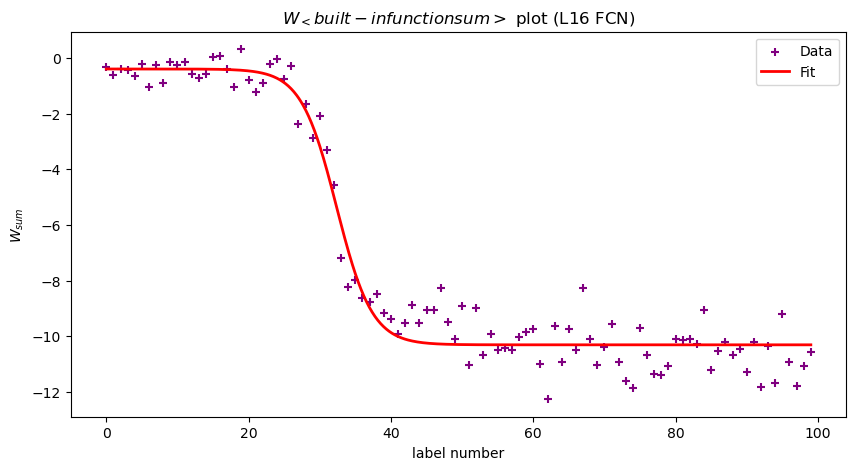

Fitted Parameters:
a: -4.954313001469575
b: 0.200620810974639
c: -6.492022643549169
d: -5.350769030792511


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.title(f'$W_{sum}$ plot (L{lattice_size} FCN)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
# 図をファイルとして保存
plt.savefig(f'image/L{lattice_size}_FCNN_weight_sum.png')
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [36]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 32.359667035589055
beta: 0.4614922588734475
